# Evaluating the ResNet20 Model

The aim of this experiment is to evaluate the performance of the ResNet20 model trained on FER2013 dataset to recognize emotions from images

In [1]:
import os
os.sys.path.insert(0, "../") 

from models import ResNet20

model = ResNet20(input_shape=(48, 48))
model.load("../models/resnet20.h5")

Using TensorFlow backend.


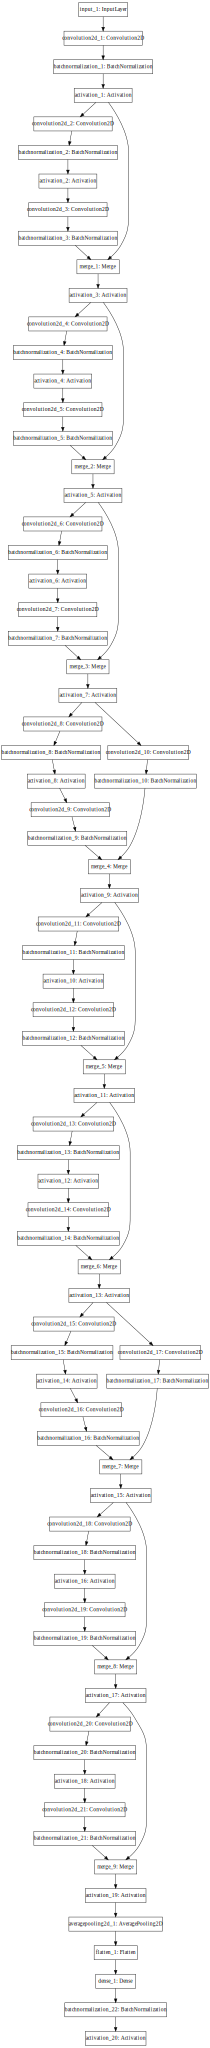

In [7]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot


SVG(model_to_dot(model.model).create(prog="dot", format="svg"))

In [17]:
import numpy as np
import csv
import tqdm


images = [list() for i in range(7)]
with open("../data/fer2013/fer2013.csv") as f:
    reader = csv.reader(f)

    # skip header
    next(reader, None)
    
    for i, (emotion, pixels, usage) in tqdm.tqdm(enumerate(reader), desc="reading", total=35887):
        if usage == "PrivateTest":
            pixels = np.fromstring(pixels, sep=" ").reshape((48, 48))
            images[int(emotion)].append(pixels)


reading: 100%|██████████| 35887/35887 [00:06<00:00, 5245.17it/s]


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = np.zeros((7, 7))

misclassified = [list() for i in range(7)]

for emotion_id, emotion_images in tqdm.tqdm(enumerate(images), total=len(images)):
    for image_id, image in enumerate(emotion_images):
        predicted_probs = model.predict(image)
        predicted = np.argmax(predicted_probs)
        confusion_matrix[emotion_id][predicted] += 1
        if predicted != emotion_id:
            misclassified[emotion_id].append((image, predicted_probs, predicted))

100%|██████████| 7/7 [02:03<00:00, 19.53s/it]


In [57]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
for emotion_id, emotion_name in enumerate(emotions):
    print "{0} - {1} out of {2} misclassified".format(emotion_name, len(misclassified[emotion_id]), len(images[emotion_id]),)

Angry - 241 out of 491 misclassified
Disgust - 18 out of 55 misclassified
Fear - 297 out of 528 misclassified
Happy - 84 out of 879 misclassified
Sad - 237 out of 594 misclassified
Surprise - 114 out of 416 misclassified
Neutral - 214 out of 626 misclassified


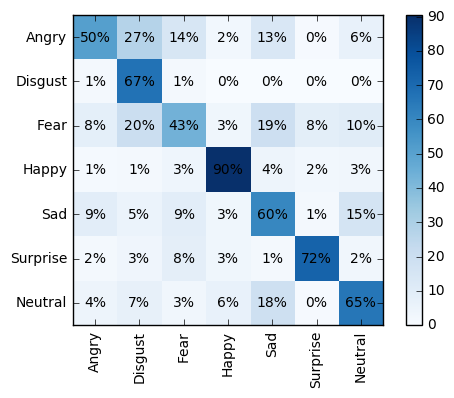

In [63]:
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)

normalized = 100 * np.array(confusion_matrix) / confusion_matrix.sum(axis=1)
res = ax.imshow(np.array(normalized), cmap="Blues", 
                interpolation="nearest")
width, height = confusion_matrix.shape
cb = fig.colorbar(res)
for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(int(normalized[x][y])) + "%", xy=(y, x), 
                    horizontalalignment="center",
                    verticalalignment="center")
plt.xticks(range(width), emotions, rotation="vertical");
plt.yticks(range(height), emotions);